**Modelo de red neuronal LSTM**

Este archivo consta de los codigos y conclusiones de:
* 1.Carga de librerias y datos
* 2.Normalizar Datos.
* 3.Preparar datos para realizar aprendizaje supervizado.
* 4.Modelo LSTM
* 5.Evaluacion del modelo


#1.Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [101]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dropout, LSTM, Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time


In [102]:
pip install h5py --quiet

In [103]:
import os

In [104]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [105]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


Se obtiene conjunto de datos

In [106]:
predictor_variables.head(5)

,Global_active_power(t-2)(t-2),Global_active_power(t-2)(t-1),Global_active_power(t-2)(t-0),Global_active_power(t-2)(t+1),Global_active_power(t-1)(t-2),Global_active_power(t-1)(t-1),Global_active_power(t-1)(t-0),Global_active_power(t-1)(t+1),Global_active_power(t-0)(t-2),Global_active_power(t-0)(t-1),...,Sub_metering_3(t-1)(t-1),Sub_metering_3(t-1)(t-0),Sub_metering_3(t-1)(t+1),Sub_metering_3(t-0)(t-2),Sub_metering_3(t-0)(t-1),Sub_metering_3(t-0)(t-0),Sub_metering_3(t-0)(t+1),error(t-2),error(t-1),error(t-0)
dt,,,,,,,,,,,,,,,,,,,,,
2007-01-07,2.034827,-0.479665,-0.913282,2.902136,-0.479665,-0.913282,2.902136,1.974266,-0.913282,2.902136,...,-1.170300,0.438568,-0.425828,-1.170300,0.438568,-0.425828,-0.930715,2.280872,0.278936,-0.866051
2007-01-08,-0.479665,-0.913282,2.902136,1.974266,-0.913282,2.902136,1.974266,-0.073304,2.902136,1.974266,...,0.438568,-0.425828,-0.930715,0.438568,-0.425828,-0.930715,0.940831,0.278936,-0.866051,0.430586
2007-01-09,-0.913282,2.902136,1.974266,-0.073304,2.902136,1.974266,-0.073304,1.522701,1.974266,-0.073304,...,-0.425828,-0.930715,0.940831,-0.425828,-0.930715,0.940831,2.183893,-0.866051,0.430586,0.124135
2007-01-10,2.902136,1.974266,-0.073304,1.522701,1.974266,-0.073304,1.522701,1.172214,-0.073304,1.522701,...,-0.930715,0.940831,2.183893,-0.930715,0.940831,2.183893,0.148337,0.430586,0.124135,0.032242
2007-01-11,1.974266,-0.073304,1.522701,1.172214,-0.073304,1.522701,1.172214,0.539574,1.522701,1.172214,...,0.940831,2.183893,0.148337,0.940831,2.183893,0.148337,0.469008,0.124135,0.032242,0.352940


In [107]:
df

,Global_active_power(t-2),Global_active_power(t-1),Global_active_power(t-0),Global_intensity(t-2),Global_intensity(t-1),Global_intensity(t-0),Global_reactive_power(t-2),Global_reactive_power(t-1),Global_reactive_power(t-0),Voltage(t-2),...,Sub_metering_1(t-2),Sub_metering_1(t-1),Sub_metering_1(t-0),Sub_metering_2(t-2),Sub_metering_2(t-1),Sub_metering_2(t-0),Sub_metering_3(t-2),Sub_metering_3(t-1),Sub_metering_3(t-0),error
dt,,,,,,,,,,,,,,,,,,,,,
2007-01-04,2.034827,-0.479665,-0.913282,1.981839,-0.505030,-0.919220,-0.579222,0.254588,0.380838,-0.344607,...,-1.006100,-1.006100,-1.006100,-0.715621,-0.717544,-0.719467,-0.877707,-0.698740,-1.170300,2.280872
2007-01-05,-0.479665,-0.913282,2.902136,-0.505030,-0.919220,2.905632,0.254588,0.380838,0.491035,0.541014,...,-1.006100,-1.006100,-0.344237,-0.717544,-0.719467,2.768191,-0.698740,-1.170300,0.438568,0.278936
2007-01-06,-0.913282,2.902136,1.974266,-0.919220,2.905632,1.963020,0.380838,0.491035,-0.085215,1.328309,...,-1.006100,-0.344237,-0.072187,-0.719467,2.768191,-0.702637,-1.170300,0.438568,-0.425828,-0.866051
2007-01-07,2.902136,1.974266,-0.073304,2.905632,1.963020,-0.014000,0.491035,-0.085215,0.291083,-0.529403,...,-0.344237,-0.072187,-0.164759,2.768191,-0.702637,-0.691578,0.438568,-0.425828,-0.930715,0.430586
2007-01-08,1.974266,-0.073304,1.522701,1.963020,-0.014000,1.606520,-0.085215,0.291083,1.356397,-0.165616,...,-0.072187,-0.164759,0.245206,-0.702637,-0.691578,3.047088,-0.425828,-0.930715,0.940831,0.124135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-22,0.032087,1.096846,-1.105542,0.006463,1.127078,-1.141766,-1.078172,-0.468472,-1.143491,-0.384731,...,-1.006100,1.744002,-1.006100,-0.652628,0.532204,-0.641569,0.705707,0.579485,-1.166889,0.982484
2010-11-23,1.096846,-1.105542,0.832664,1.127078,-1.141766,0.855964,-0.468472,-1.143491,-0.694124,-0.110682,...,1.744002,-1.006100,2.051319,0.532204,-0.641569,0.129727,0.579485,-1.166889,0.239133,-0.644348
2010-11-24,-1.105542,0.832664,0.044213,-1.141766,0.855964,0.063249,-1.143491,-0.694124,-0.791075,0.168385,...,-1.006100,2.051319,0.172155,-0.641569,0.129727,-0.664650,-1.166889,0.239133,-0.423466,0.366363


In [108]:
predictor_variables=pd.read_csv('predictor_variables.csv', index_col='dt')
target_variables=pd.read_csv('target_variables.csv', index_col='dt')
df=pd.read_csv('df_modelo.csv', index_col='dt')

#Exportar resultados

In [109]:
result_transformer=pd.read_csv('results_Transformer_CE.csv')
result_transformer = result_transformer.sort_values(by='MSE', ascending=True)
result_transformer.head(5)


,index,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
0,439,Transformer_CE_800_40.0_128.0_6.0_0.64_160.0_3...,88,5,47.148076,0.370745,0.608889,0.442792,215.380447
1,159,Transformer_CE_800_20.0_192.0_6.0_0.59_128.0_4...,32,5,49.049351,0.372243,0.610117,0.453836,239.374893
2,259,Transformer_CE_800_50.0_128.0_5.0_0.47_160.0_2...,52,5,76.609337,0.374506,0.611969,0.451261,210.443329
3,494,Transformer_CE_800_40.0_128.0_6.0_0.61_160.0_3...,99,5,69.508075,0.374999,0.612372,0.450840,214.465591
4,299,Transformer_CE_800_10.0_160.0_6.0_0.59_96.0_4....,60,5,109.001675,0.377282,0.614233,0.453981,207.757339


In [110]:
nombre_archivo=result_transformer['nameModel'].iloc[0]
nombre_archivo

'Transformer_CE_800_40.0_128.0_6.0_0.64_160.0_3.6125042299943215e-05'

In [111]:
nombre_json=nombre_archivo+"."+"json"
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos-2/result_Transformer'
ruta = os.path.join(carpeta_destino, nombre_json)
save_w=nombre_archivo+"."+"h5"
weights_path = os.path.join(carpeta_destino, save_w)

In [112]:
# load json and create model
json_file = open(ruta, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=3.6125042299943215e-05), metrics = [tf.keras.metrics.MeanSquaredError(),
                            tf.keras.metrics.RootMeanSquaredError(),
                            tf.keras.metrics.MeanAbsoluteError(),
                            tf.keras.metrics.MeanAbsolutePercentageError()])


Loaded model from disk


# Generar Narmax data


In [113]:
#Se da formato de entradas como: Un tensor 3D con la forma [batch, timesteps, feature]
predictor=np.array(predictor_variables)
target=np.array(target_variables)
predictor= predictor.reshape((predictor_variables.shape[0], 1, predictor_variables.shape[1]))
shape_target=target_variables.shape

In [114]:
def narmax_data(data,modelo,predictor,shape_target,retrasos,target):
  #Se realiza prediccion
  results = modelo.predict(predictor)
  results = results.reshape(shape_target)
  target=np.array(target_variables)

  error=[]
  aux=0
  for prediccion, real in zip(results,target):
    aux=real-prediccion
    error.append(aux[0])

  df_narmax = data.iloc[retrasos:]
  # Agregamos el arreglo como nueva columna en el DataFrame
  df_narmax['error'] = error

  return df_narmax

In [115]:
df=narmax_data(df,loaded_model,predictor,shape_target,3,target)
df

45/45 [==============================] - 0s 3ms/step


<ipython-input-114-f1dc910ea6fc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narmax['error'] = error


,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,error
dt,,,,,,,,
2007-01-04,2.902136,2.905632,0.491035,-0.529403,-0.344237,2.768191,0.438568,2.515916
2007-01-05,1.974266,1.963020,-0.085215,-0.165616,-0.072187,-0.702637,-0.425828,1.074079
2007-01-06,-0.073304,-0.014000,0.291083,-0.567097,-0.164759,-0.691578,-0.930715,-0.537732
2007-01-07,1.522701,1.606520,1.356397,0.032864,0.245206,3.047088,0.940831,0.900755
2007-01-08,1.172214,1.174003,0.595142,-0.613996,-1.006100,-0.660322,2.183893,0.159451
...,...,...,...,...,...,...,...,...
2010-11-22,0.832664,0.855964,-0.694124,-0.311355,2.051319,0.129727,0.239133,1.137762
2010-11-23,0.044213,0.063249,-0.791075,-0.126691,0.172155,-0.664650,-0.423466,-0.714329
2010-11-24,0.415859,0.403559,-0.889726,-0.392438,-0.315898,0.484599,0.787056,0.445984


#3.Preparar datos para realizar aprendizaje supervizado.

La idea es modelar cada valor en función de los valores recientes anteriores, dado un retardo de tiempo dado. **Los valores futuros de una variable en una serie de tiempo dependen de sus propios rezagos y de los rezagos de otras variables.**

In [116]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Incrustación de retardo de tiempo
    :param series: serie de tiempo como objeto de pandas
    :param n_lags: número de valores pasados para usar como variables explicativas
    :param horizon: horizonte de pronostico
    :return:pd.DataFrame con series temporales reconstruidas
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    serie_time_delay = [series.shift(i) for i in n_lags_iter]
    serie_time_delay = pd.concat(serie_time_delay, axis=1).dropna()
    serie_time_delay.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return serie_time_delay

In [117]:
serie_split = []
for columna in df:
  col_df = time_delay_embedding(
      df[columna], #Serie de tiempo
      n_lags=3, #Numero de retrasos
      horizon=1 # Horizonte de prediccion
      )
  serie_split.append(col_df)

In [118]:
serie_df = pd.concat(serie_split, axis=1).dropna()

In [119]:
predictor_variables = serie_df.columns.str.contains('\(t\-')
target_variables = serie_df.columns.str.contains('Global_active_power\(t\+')

In [120]:
predictor_variables = serie_df.iloc[:, predictor_variables]
target_variables = serie_df.iloc[:, target_variables]

In [121]:
df.head(8)

,Global_active_power,Global_intensity,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,error
dt,,,,,,,,
2007-01-04,2.902136,2.905632,0.491035,-0.529403,-0.344237,2.768191,0.438568,2.515916
2007-01-05,1.974266,1.963020,-0.085215,-0.165616,-0.072187,-0.702637,-0.425828,1.074079
2007-01-06,-0.073304,-0.014000,0.291083,-0.567097,-0.164759,-0.691578,-0.930715,-0.537732
2007-01-07,1.522701,1.606520,1.356397,0.032864,0.245206,3.047088,0.940831,0.900755
2007-01-08,1.172214,1.174003,0.595142,-0.613996,-1.006100,-0.660322,2.183893,0.159451
2007-01-09,0.539574,0.564223,0.588816,-0.169639,0.056912,1.166936,0.148337,0.109223
2007-01-10,1.025127,1.059279,1.008014,0.093847,-0.520566,1.257818,0.469008,0.287937
2007-01-11,1.195721,1.237118,1.039013,0.156426,-0.138310,0.158578,0.837177,0.444093


In [122]:
predictor_variables.head(5)

,Global_active_power(t-2),Global_active_power(t-1),Global_active_power(t-0),Global_intensity(t-2),Global_intensity(t-1),Global_intensity(t-0),Global_reactive_power(t-2),Global_reactive_power(t-1),Global_reactive_power(t-0),Voltage(t-2),...,Sub_metering_1(t-0),Sub_metering_2(t-2),Sub_metering_2(t-1),Sub_metering_2(t-0),Sub_metering_3(t-2),Sub_metering_3(t-1),Sub_metering_3(t-0),error(t-2),error(t-1),error(t-0)
dt,,,,,,,,,,,,,,,,,,,,,
2007-01-07,2.902136,1.974266,-0.073304,2.905632,1.963020,-0.014000,0.491035,-0.085215,0.291083,-0.529403,...,-0.164759,2.768191,-0.702637,-0.691578,0.438568,-0.425828,-0.930715,2.515916,1.074079,-0.537732
2007-01-08,1.974266,-0.073304,1.522701,1.963020,-0.014000,1.606520,-0.085215,0.291083,1.356397,-0.165616,...,0.245206,-0.702637,-0.691578,3.047088,-0.425828,-0.930715,0.940831,1.074079,-0.537732,0.900755
2007-01-09,-0.073304,1.522701,1.172214,-0.014000,1.606520,1.174003,0.291083,1.356397,0.595142,-0.567097,...,-1.006100,-0.691578,3.047088,-0.660322,-0.930715,0.940831,2.183893,-0.537732,0.900755,0.159451
2007-01-10,1.522701,1.172214,0.539574,1.606520,1.174003,0.564223,1.356397,0.595142,0.588816,0.032864,...,0.056912,3.047088,-0.660322,1.166936,0.940831,2.183893,0.148337,0.900755,0.159451,0.109223
2007-01-11,1.172214,0.539574,1.025127,1.174003,0.564223,1.059279,0.595142,0.588816,1.008014,-0.613996,...,-0.520566,-0.660322,1.166936,1.257818,2.183893,0.148337,0.469008,0.159451,0.109223,0.287937


In [123]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %30 de la data para test
X_train, X_test, Y_train, Y_test = train_test_split(predictor_variables, target_variables, test_size=0.2, shuffle=False)

shape_x_test=X_test.shape
shape_y_test=Y_test.shape

print("Separacion de datos terminada!")

Separacion de datos terminada!


In [124]:
#Se da formato de entradas como: Un tensor 3D con la forma [batch, timesteps, feature]
X_train=np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

Y_train_s=np.array(Y_train)
Y_train_s = Y_train_s.reshape((Y_train_s.shape[0], 1, Y_train_s.shape[1]))

X_test=np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Y_test=np.array(Y_test)
Y_test = Y_test.reshape((Y_test.shape[0], 1, Y_test.shape[1]))

#Transformer

In [125]:
# Ajustar parámetros para reproducibilidad del entrenamiento
#tf.random.set_seed(123)
keras.utils.set_random_seed(123)
tf.config.experimental.enable_op_determinism()

In [126]:
# Transformer with Bayesian optimization and Cross-validation
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Model
from keras.layers import Input, Dense, Dropout, TimeDistributed
from keras.layers import LayerNormalization, MultiHeadAttention, Add
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

In [127]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization()(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    x = LayerNormalization()(res)
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

In [128]:
def create_model(head_size, dropout,num_heads,learning_rate,ff_dim):
    inputs = Input(shape=(X_train.shape[1],X_train.shape[2]))
    x = inputs
    for _ in range(2):  # two transformer blocks
        x = transformer_encoder(x, head_size=head_size, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)
    outputs = TimeDistributed(Dense(1))(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics = [tf.keras.metrics.MeanSquaredError(),
                            tf.keras.metrics.RootMeanSquaredError(),
                            tf.keras.metrics.MeanAbsoluteError(),
                            tf.keras.metrics.MeanAbsolutePercentageError()])
    return model

In [129]:
def objective(params):

    # Definir los hiperparámetros a optimizar
    head_size = params['head_size']
    num_heads = params['num_heads']
    ff_dim  = params['ff_dim']
    dropout  = params['dropout']
    epochs = params['epochs']
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']



    #kf = KFold(n_splits=5)
    tscv = TimeSeriesSplit(n_splits=5)
    scores = []
    times=[]
    models=[]
    scores_test=[]

    #Se detiene el entrenamiento en el momento que se observe un incremento en el valor del error de validación.
    early_stop = EarlyStopping(monitor='val_loss', patience=30, mode='min',restore_best_weights=True)

    #Validacion cruzada
    for train_index, test_index in tscv.split(X_train):
      X_train_, X_test_ = X_train[train_index], X_train[test_index]
      y_train_, y_test_ = Y_train_s[train_index], Y_train_s[test_index]

      # Crear el modelo de Transformer
      model = create_model(int(head_size), float(dropout),int(num_heads),float(learning_rate),int(ff_dim))

      #Entrenamiento
      start = time.time()
      hist=model.fit(X_train_, y_train_, batch_size=int(batch_size), epochs=int(epochs), verbose=0, validation_data=(X_test_, y_test_),callbacks=[early_stop],use_multiprocessing=True)
      end = time.time()

      #Evaluacion del modelo
      score = model.evaluate(X_test_, y_test_, verbose = 0)
      scores.append(score)
      #Error en conjunto de test
      score_test = model.evaluate(X_test, Y_test, verbose = 0)
      scores_test.append(score_test)


      #guardar modelo keras
      models.append(model)

      #Tiempo de la validadion cruzada
      time_val= end- start
      times.append(time_val)

    return{'loss': np.mean(scores),
            'status': STATUS_OK,
            'model': model,
            'params': params,
            'hist':hist,
            'scores_test': scores_test,
            'time':times,
            'scores': scores,
            'models':models}

In [130]:
'''
# Define the search space for hyperparameters
space = {
    'head_size': hp.quniform('head_size', 64, 256, 32),
    'num_heads':hp.quniform('num_heads', 4, 8, 1),
    'ff_dim': hp.quniform('ff_dim', 64, 256, 32),
    'dropout':hp.uniform('dropout', 0.4, 0.7),
    'learning_rate': hp.uniform('learning_rate', 0.00001, 0.00005),
    'epochs': 800,
    'batch_size':  hp.quniform('batch_size', 10, 100, 10),
}
'''

"\n# Define the search space for hyperparameters\nspace = {\n    'head_size': hp.quniform('head_size', 64, 256, 32),\n    'num_heads':hp.quniform('num_heads', 4, 8, 1),\n    'ff_dim': hp.quniform('ff_dim', 64, 256, 32),\n    'dropout':hp.uniform('dropout', 0.4, 0.7),\n    'learning_rate': hp.uniform('learning_rate', 0.00001, 0.00005),\n    'epochs': 800,\n    'batch_size':  hp.quniform('batch_size', 10, 100, 10),\n}\n"

In [131]:

space = {
    'head_size':500,
    'num_heads':10,
    'ff_dim': 500,
    'dropout':0.59,
    'learning_rate': 0.00008,
    'epochs': 800,
    'batch_size': 30,
}


In [132]:
# Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1, trials=trials)


100%|██████████| 1/1 [01:06<00:00, 66.31s/trial, best loss: 54.57075603246689]


In [133]:
#Obtener el valor de la función objetivo del mejor ensayo
best_trial = trials.best_trial
hist = best_trial['result']['hist']
best_model = best_trial['result']['model']
scores_model = best_trial['result']['scores']

In [134]:
# Obtener una lista de los resultados de todas las evaluaciones
all_results = [trial['result'] for trial in trials]

# Mejores hiperparámetros encontrados
best_params = space_eval(space, best)
best_params

{'batch_size': 30,
 'dropout': 0.59,
 'epochs': 800,
 'ff_dim': 500,
 'head_size': 500,
 'learning_rate': 8e-05,
 'num_heads': 10}

In [135]:
#Metricas de precision del modelo
score = best_model.evaluate(X_test, Y_test, verbose = 0)
print('MSE:', score[1])
print('RMSE:', score[2])
print('MAE:', score[3])
print('MAPE:', score[4])

MSE: 0.4034658372402191
RMSE: 0.6351895928382874
MAE: 0.46939924359321594
MAPE: 219.0874786376953


# 6.Evaluacion del modelo

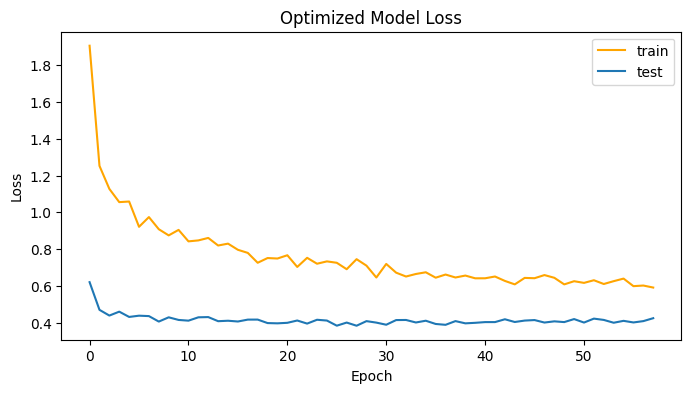

In [63]:
plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], color = 'orange')
plt.plot(hist.history['val_loss'])
plt.title('Optimized Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [64]:
#Se realiza prediccion
results = best_model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [65]:
results = results.reshape(shape_y_test)
y_grafico = Y_test.reshape(shape_y_test)

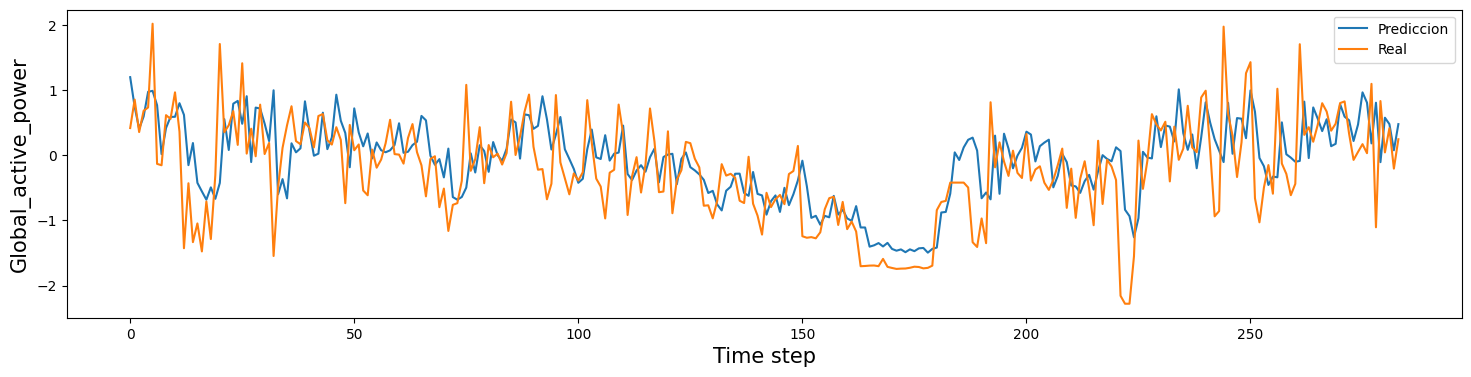

In [66]:
#Grafico de prediccion con el valor real
tiempo=[x for x in range(y_grafico.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tiempo,results)
plt.ylabel('Global_active_power', size=15)
plt.plot(tiempo,y_grafico)
plt.xlabel('Time step', size=15)
plt.legend(['Prediccion','Real'])
plt.show()

In [67]:
#Metricas de precision del modelo
score = best_model.evaluate(X_test, Y_test, verbose = 0)
print('MSE:', score[1])
print('RMSE:', score[2])
print('MAE:', score[3])
print('MAPE:', score[4])

MSE: 0.4037088453769684
RMSE: 0.6353808641433716
MAE: 0.46745729446411133
MAPE: 240.60057067871094


#Exportar resultados

Se guardan los resultados la optimizacion bayesiana

In [ ]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los parametros para exportalos a un csv
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  i=0
  for time in result['time']:
    k+=1
    nameModel = "Transformer_CE" + "_"+str(trial)+"_"+str(k) + "_"+str(result['params']['epochs'])+"_"+str(result['params']['batch_size'])+"_"+str(result['params']['head_size'])+"_"+str(result['params']['num_heads'])+"_"+str(round(result['params']['dropout'],2))+"_"+str(result['params']['ff_dim'])+"_"+str(result['params']['learning_rate'])
    results.append([nameModel,trial,k,time,
                    result['scores_test'][i][0],result['scores_test'][i][2],result['scores_test'][i][3],result['scores_test'][i][4]]
                   )
    i+=1

In [ ]:
#Se crea dataframe
results_csv=pd.DataFrame(results,columns=['nameModel','trial_optimizacion_bayesiana','Step_validacion','time','MSE','RMSE','MAE','MAPE'])


In [ ]:
results_o = results_csv.sort_values(by='MSE', ascending=True)
results_o.head(5)

In [ ]:
# Exportar el DataFrame como CSV
results_csv.to_csv('Narmax_results_Transformer_CE.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-23961f3606bd>", line 2, in <cell line: 2>
    results_csv.to_csv('Narmax_results_Transformer_CE.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 3720, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py", line 1189, in to_csv
    csv_formatter.save()
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/csvs.py", line 241, in save
    with get_handle(
  File "/usr/local/lib/python3.10/

Se guarda cada modelo keras en un objeto Json

In [ ]:
import os
# Ruta de la carpeta que deseas crear
carpeta_destino = '/content/gdrive/MyDrive/Tesis/Datos-2/Narmax_result_trans'

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta_destino):
    # Crear la carpeta si no existe
    os.makedirs(carpeta_destino)

In [ ]:
#Del objeto all_results donde estan los resultados de cada trial de la optimizacion bayesiana se obtiene los modelos para exportalos a un Json
results=[]
trial=0 #Nº de intento de optimizacion bayesiana

for result in all_results:
  k=0 #validacion cruzada
  trial+=1
  i=0
  for model in result['models']:
    k+=1
    nameModel = "Transformer_CE" +"_"+str(trial)+"_"+str(k) + "_"+str(result['params']['epochs'])+"_"+str(result['params']['batch_size'])+"_"+str(result['params']['head_size'])+"_"+str(result['params']['num_heads'])+"_"+str(round(result['params']['dropout'],2))+"_"+str(result['params']['ff_dim'])+"_"+str(result['params']['learning_rate'])
    model_json = model.to_json()
    ruta = os.path.join(carpeta_destino, nameModel + ".json")
    with open(ruta, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    save_w=nameModel+"."+"h5"
    weights_path = os.path.join(carpeta_destino, save_w)
    model.save_weights(weights_path)
    i+=1